In [1]:
#Net_PREDICT_LABELS_A2UN91_5_HP60_nfull_lr1e-05_conv1FS60
#MODEL_TO_LOAD = 'GRAPHBACKUPS/Net_UNBALANCED91_4_nfull_lr0.0001/model.ckpt-6'
#MODEL_TO_LOAD = 'EPOCH_SAVED/Net_UNBALANCED91_5_nfull_lr1e-05/model.ckpt-6'
#MODEL_TO_LOAD = 'GRAPHBACKUPS/Net_PREDICT_LABELS_A2UN91_5_HP60_nfull_lr1e-05_conv1FS60/model.ckpt-0'
#MODEL_TO_LOAD  ="EPOCH_SAVED/Net_PREDICT_LABELS_sedgetest4_HP30_nfull_lr0.0001_conv1FS30_mFalse/model.ckpt-0"

#MODEL_TO_LOAD = 'EPOCH_SAVED/Net_PREDICT_LABELS_A2UN91_5_HP9_nfull_lr1e-05_conv1FS9/model.ckpt-11'

#These two have the hanning window on conv1
#MODEL_TO_LOAD = "Saved_Sessions/Net_PREDICT_LABELS_sedgetest4_HP30_nfull_lr0.0001_conv1FS30_mFalse/model.ckpt"
#MODEL_TO_LOAD = "Saved_Sessions/Net_PREDICT_LABELS_sedgetest5_HP30_nfull_lr1e-05_conv1FS30_mFalse/model.ckpt"

#MODEL_TO_LOAD = "EPOCH_SAVED/Net_PREDICT_LABELS_sedgetest5_HP30_nfull_lr1e-05_conv1FS30_mFalse/model.ckpt-4"
#change these to build the correct model

MODEL_TO_LOAD = 'Saved_Sessions/Net_PREDICT_LABELS_A2UN91_5_HP9_nfull_lr1e-05_conv1FS9/model.ckpt'


TASK = "PREDICT_LABELS"
#TASK = "PREDICT_COUNTS"
multiple_labels = True
Conv1_filtersize = 9
padding = "SAME"
#padding = "VALID"
poolmethod ="HPOOL"
#poolmethod ="MAXPOOL"
conv1_times_hanning = False
Net_or_VGG = "Net" 

#these aren't changed often.
music_only = False 
Learning_Rate = 1e-4
COCHLEAGRAM_LENGTH = int(342000)
numlabels = 527

limit = 1000 #does nothing here
name = "BBB_TEST5" #does nothing here
unbalanced = True #does nothing here
folder = "TB2" #does nothing here
OVERIDE_FOLDER = None#"does nothing here
SAVE = False #does nothing here


In [2]:
import tensorflow as tf
import numpy as np
import sys
import h5py
import random
import math
from math import sqrt
import argparse

from IPython.core.display import HTML, display
import scipy.signal as signal
from scipy.io import wavfile

import matplotlib
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PedrosNetworkFunctions import *

#####################
#READ IN THE TESTING BATCH

#set up batch with some good sounds

#sounds indeces of the good samples we want to use
#test_indeces =[4,7,10,230,233,660,1278,2079,2290,2295,5098,5104,5104,5105,6005,6025,6021,6024,6027,6009,12,10005,10015,10018,10020,10023,10035]

test_indeces= [15695,10795,15732,4040,10430,13920,12071,18594,2846,2155,15131,18539,942,682,2828,12889,18257,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

#Cochs = h5py.File("/home/ribeirop/OMFOLDER/audiosetDL/balanced_stripped/balanced_train_segments_Coch.hdf5")
#Wavs = hdf5file=h5py.File("/home/ribeirop/OMFOLDER/audiosetDL/balanced_stripped/balanced_train_segments.hdf5")
Wavs = hdf5file=h5py.File("/home/ribeirop/OMFOLDER/audiosetDL/eval_stripped/eval_segments.hdf5")
Cochs = h5py.File("/home/ribeirop/OMFOLDER/audiosetDL/eval_stripped/eval_segments_Coch.hdf5")
#Cochs = h5py.File("/home/ribeirop/OMFOLDER/audiosetDL/unbalanced_stripped/unbalanced_train_segments_Coch.hdf5")
#Wavs = hdf5file=h5py.File("/om/data/public/audioset/unbalanced_stripped/unbalanced_train_segments.hdf5")


train_averagefile = "/om/user/ribeirop/audiosetDL/unbalanced_stripped/unbalanced_train_segments_average.npy"
train_mean_coch = np.load(train_averagefile)

wavSet = Wavs["/wav"]
cochSet = Cochs["/coch"]
labelSet = Cochs["/labels"]

coch_batch = []
label_batch = []
wav_batch = []
for i in test_indeces:
    coch_batch.append(cochSet[i])
    label_batch.append(labelSet[i])
    wav_batch.append(wavSet[i])
    
coch_batch = coch_batch*1
label_batch = label_batch * 1

indeces_list = []
total_count = 0 #total number of labels
for row in label_batch:
    indeces= np.where(row==1)[0]
    total_count = total_count + len(indeces)
    indeces_list.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))

####################
#READ IN NETWORK

TensorBoard_Folder = './TB_Test/nettest'
Saver_Folder = './Saved_Sessions/nettest'
    
nets = Gen_audiosetNet(COCHLEAGRAM_LENGTH,numlabels,train_mean_coch,Conv1_filtersize,padding, poolmethod,conv1_times_hanning=conv1_times_hanning)
#Get the loss functions
Cross_Entropy_Train_on_Labels(nets,numlabels,Learning_Rate,multiple_labels)
saver = tf.train.Saver()
print("done reading")

/om/user/ribeirop/AUDIOSET_EXPERIMENTS/PedrosNetworkFunctions.py:854: RuntimeWarning: divide by zero encountered in log10
  response = 20.0 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))


done reading


In [ ]:
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    #now you can do things

In [ ]:
#print all the filter maps
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    filtermaps = sess.run(nets['grid'],feed_dict={})[0,:,:,0]
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(filtermaps, origin='lower', cmap='Greys')
    divider = make_axes_locatable(ax)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cax,cax2)
    ax.set_title("cov1_weights")
    plt.show()

In [ ]:
#print the filters (with and without hanning window)
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plot_filter_weights(nets, MODEL_TO_LOAD,style_layers, conv1_size=9, conv2_size=5, save_file=False):
    ## Takes in the style_layers and plots the filters (and the biases) for all of the filters of the layer. 
    ## Inputs: 
    ##      checkpoint_to_load = path to the checkpoint for the tensorflow model (as a string)
    ##      style_layers = list of the layers of the network to plot
    ##      conv1_size = the size of the first layer filters (used for making the network)
    ##      conv2_size = the size of the second layer filters (used for making the network)
    ##      save_file = False if the plots shouldn't be saved, a string to the base file name if they should be saved. 
    ## Returns:
    ##      weights = dictionary with the filter weights for each layer as an array
    ##      biases = dictionary with the filter biases for each layer
    
    weights = {}
    biases = {}
    for layer in range(len(style_layers)):
        weights[layer] = nets[style_layers[layer][0]].eval()
        biases[layer] = nets[style_layers[layer][1]].eval()
        num_filters = weights[layer].shape[-1]
        shape_filters = weights[layer].shape[0]
        row_filters = weights
        num_columns = 12
        num_rows = np.ceil(num_filters/num_columns)
        plt.figure(figsize=(60,5*num_rows))
        ax = None
        for i in range(num_filters):
            ax = plt.subplot(num_rows,num_columns,i+1,sharex=ax)
            norm = MidpointNormalize(midpoint=0)
            plt.matshow(weights[layer][:,:,0,i], norm=norm, cmap=plt.cm.RdBu_r, fignum=False,
                        vmin=weights[layer][:,:,0,i].min()*2, vmax=weights[layer][:,:,0,i].max()*2, interpolation='none', origin="lower")
            #plt.title("filter %d, bias %f"%(i,biases[layer][i]))
                        
            M = float(weights[layer][:,:,0,i].max())
            m = float(weights[layer][:,:,0,i].min())
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            #plt.title("filter {0}, bias {1}, Max {2}, Min {3}".format(i,biases[layer][i],M,m))
            #plt.title("filter {0}, bias {1:.2f}, Max {2:.6f}, Min {3:.6f}".format(i,biases[layer][i], M,m))
        plt.suptitle("60x60 Filters for the First Convolutional Layer ", fontsize=100,y=.93)
        plt.show()
        if save_file:
            plt.savefig(save_file + layer + '_weights' + '.png')
            plt.close()

    return weights, biases
    
style_layers = [['conv1_Weights','conv1_bias']] #,['conv2_Weights','conv2_bias']]
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    plot_filter_weights(nets, MODEL_TO_LOAD,style_layers, conv1_size=9, conv2_size=5, save_file=False)

    if 'conv1_Weights_x_h_kernal' in nets.keys():
        style_layers = [['conv1_Weights_x_h_kernal','conv1_bias']] #,['conv2_Weights','conv2_bias']]
        plot_filter_weights(nets, MODEL_TO_LOAD,style_layers, conv1_size=9, conv2_size=5, save_file=False)

    
    
print("done")

In [ ]:
print("{0:.2f}".format(1.02345))

In [ ]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plot_filter_maps(nets,feed_dict,coch_batch,style_layers, conv1_size=9, conv2_size=5, save_file=False):
    ## Takes in the style_layers and plots the filters (and the biases) for all of the filters of the layer. 
    ## Inputs: 
    ##      checkpoint_to_load = path to the checkpoint for the tensorflow model (as a string)
    ##      style_layers = list of the layers of the network to plot
    ##      conv1_size = the size of the first layer filters (used for making the network)
    ##      conv2_size = the size of the second layer filters (used for making the network)
    ##      save_file = False if the plots shouldn't be saved, a string to the base file name if they should be saved. 
    ## Returns:
    ##      weights = dictionary with the filter weights for each layer as an array
    ##      biases = dictionary with the filter biases for each layer
    im = [0,0]
    print("original cochleagram")
    fig, ax = plt.subplots(figsize=(18, 10))
    #np.reshape(cochSet[index], (171,2000))
    cax = ax.matshow(np.reshape(coch_batch[im[0]][0:COCHLEAGRAM_LENGTH], (171,int(COCHLEAGRAM_LENGTH/171))), origin='lower', cmap='inferno')
    divider = make_axes_locatable(ax)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cax,cax=cax2)
    ax.set_title("coch_image_{0}".format(im[0]), y=1.2)
    plt.show()
    
    
    
    fig, ax = plt.subplots(figsize=(18, 10))
    #np.reshape(cochSet[index], (171,2000))
    cax = ax.matshow(np.reshape(coch_batch[im[0]][0:COCHLEAGRAM_LENGTH], (171,int(COCHLEAGRAM_LENGTH/171)))[:,0:171], origin='lower', cmap='inferno')
    divider = make_axes_locatable(ax)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cax,cax=cax2)
    ax.set_title("coch_image_{0}".format(im[0]))
    plt.show()
    
    weights = {}
    for layer in range(len(style_layers)):
        weights[layer] = sess.run(nets[style_layers[layer]],feed_dict=feed_dict)
        print(weights[layer].shape)
        
        num_filters = weights[layer].shape[-1]
        shape_filters = weights[layer].shape[1]
        row_filters = weights
        num_columns = 12
        num_rows = np.ceil(num_filters/num_columns)
        plt.figure(figsize=(60,5*num_rows))
        for i in range(num_filters):
            plt.subplot(num_rows,num_columns,i+1)
            norm = MidpointNormalize(midpoint=0)
            #plt.matshow(weights[layer][im,0:shape_filters,0:shape_filters,i], origin='lower', cmap='inferno') #weights[layer][im,0:3,0:3,i]
            plt.matshow(weights[layer][im[layer],0:shape_filters,0:shape_filters,i], norm=norm, cmap=plt.cm.RdBu_r, fignum=False,
                        vmin=weights[layer][im[layer],0:shape_filters,0:shape_filters,i].min()*2, vmax=weights[layer][im[layer],0:shape_filters,0:shape_filters,i].max()*2, interpolation='none', origin="lower")
            
            M = weights[layer][im[layer],0:shape_filters,0:shape_filters,i].max()
            m = weights[layer][im[layer],0:shape_filters,0:shape_filters,i].min()
            
           # plt.matshow(np.reshape(weights[layer][im,:,:,i],(171,int(COCHLEAGRAM_LENGTH/171)) )[:,0:171], norm=norm, cmap=plt.cm.RdBu_r, fignum=False,
           #             vmin=weights[layer][im,0:shape_filters,0:shape_filters,i].min()*2, vmax=weights[layer][im,0:shape_filters,0:shape_filters,i].max()*2, interpolation='none', origin="lower")
            
            
            #plt.title("filter {0}, Max {1}, Min {2}".format(i,M,m))
        #plt.suptitle("Feature Maps for layer " + str(layer), fontsize=24)
        plt.suptitle("60x60 Filter Feature Maps ", fontsize=100,y=.93)
        plt.show()
        if save_file:
            plt.savefig(save_file + layer + '_weights' + '.png')
            plt.close()

    return weights
    
style_layers = ['conv1','conv2']
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    feed_dict={nets['input_to_net']:coch_batch,nets['actual_labels']:label_batch,nets['label_indeces']:indeces_list,nets['keep_prob']:1}
    plot_filter_maps(nets,feed_dict, coch_batch,style_layers, conv1_size=9, conv2_size=5, save_file=False)

print("done")

In [ ]:
#print individual filters and filtermaps
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    conv1array,conv1weights= sess.run([nets['conv2'],nets['conv2_Weights']],feed_dict={nets['input_to_net']:coch_batch,nets['actual_labels']:label_batch,nets['label_indeces']:indeces_list,nets['keep_prob']:1})

    im = 0
    
    for ch in range(0,96):#)96):
        print("Cochleagram {0}, channel_{1}".format(im,ch))

        fig, ax = plt.subplots(figsize=(1, 1))
        #print(conv1weights)
        cax = ax.matshow(conv1weights[:,:,0,ch], origin='lower', cmap='Greys')
        divider = make_axes_locatable(ax)
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cax,cax2)
        ax.set_title("cov1_weight_{0}_ch_{1}".format(im,ch))
        #print(conv1array[im,:,:,ch])
        plt.show()

        print("original coch")
        fig, ax = plt.subplots(figsize=(18, 10))
        #np.reshape(cochSet[index], (171,2000))
        cax = ax.matshow(np.reshape(coch_batch[im][0:COCHLEAGRAM_LENGTH], (171,int(COCHLEAGRAM_LENGTH/171))), origin='lower', cmap='inferno')
        divider = make_axes_locatable(ax)
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cax,cax=cax2)
        ax.set_title("coch_image_{0}_ch_{1}".format(im,ch))
        plt.show()

        print("feature_map")
        fig, ax = plt.subplots(figsize=(18, 10))
        cax = ax.matshow(conv1array[im,:,:,ch], origin='lower', cmap='inferno')
        divider = make_axes_locatable(ax)
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cax,cax=cax2)
        ax.set_title("cov1_image_{0}_ch_{1}".format(im,ch))
        #print(conv1array[im,:,:,ch])
        plt.show()

        print("histogram")
        fig, ax = plt.subplots(figsize=(9, 5))
        n, bins, patches = ax.hist(conv1array[im,:,:,ch].flatten(), 50, normed=1, facecolor='green', alpha=0.75)
        bincenters = 0.5*(bins[1:]+bins[:-1])
        # add a 'best fit' line for the normal PDF
        l = ax.plot(bincenters, bincenters, 'r--', linewidth=1)
        ax.set_xlabel('Counts')
        ax.set_ylabel('Values')
        ax.grid(True)
        plt.show()

In [ ]:
#print the example sounds and their predictions

from csv import reader
import csv
#plot predictions and the actual values
def genLabelDictionary(path):
    f = open(path)
    dic = {}
    f.readline()    
    for line in reader(f):
        base = line[1]
        dic[base] = line[0]
        dic[line[0]] = line[2]
    
    return dic   

def get_label_list(dic, l):
    string = ""
    for i in l:
        if str(i) in dic:
            string = string + "[{0}],".format(dic[str(i)])
        else:
            return string
    return string

def get_label_arr(dic, l):
    string = []
    for i in l:
        if str(i) in dic:
            string.append("[{0}]".format(dic[str(i)]))
        else:
            return string
    return string

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """

    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>

    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

indeces_dict = genLabelDictionary("/home/ribeirop/mindhiveaudiofolder/class_labels_indices.csv")
#with sv.managed_session() as sess:
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    numcorrect, predictions, pred_values = sess.run([nets['numCorrect'],nets['indeces'],nets['predicted_labels']],feed_dict={nets['input_to_net']:coch_batch,nets['actual_labels']:label_batch,nets['label_indeces']:indeces_list,nets['keep_prob']:1})    
    print("Accuracy: ",numcorrect/total_count)
    for i in range(0,len(label_batch)):
        print("Sample {0}".format(i))
        print(test_indeces[i])
        wavfile.write("TESTSOUNDS/test{0}.wav".format(i),16000,wav_batch[i])
        wavPlayer("TESTSOUNDS/test{0}.wav".format(i))
        print("Actual: {0}".format(indeces_list[i]))
        print("Predicted: {0}".format(predictions[i]))
        print()
        print("Actual: {0}".format(get_label_list(indeces_dict,indeces_list[i])))
        predlabels = get_label_list(indeces_dict,predictions[i])
        print("Predicted: {0}".format(predlabels))
        
        
        normed = pred_values[i]#/ pred_values[i].sum()
        mypreds = []
        for j in predictions[i]:
            mypreds.append(pred_values[i][j])
            
        fig, ax = plt.subplots()
        rects1 = ax.bar(np.arange(0,15), mypreds, .35, color='b')
        
        plt.setp(ax, xticks=np.arange(0,15), xticklabels=get_label_arr(indeces_dict,predictions[i]))
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=80)
        #ax.set_xticklabels(get_label_arr(indeces_dict,predictions[i]),rotation=45)
        plt.show()
        
        print()
        print()
        



In [ ]:
#print the example sounds and their predictions
#for the 165 sample condition
from csv import reader
import csv
#plot predictions and the actual values
def genLabelDictionary(path):
    f = open(path)
    dic = {}
    f.readline()    
    for line in reader(f):
        base = line[1]
        dic[base] = line[0]
        dic[line[0]] = line[2]
    
    return dic   

def get_label_list(dic, l):
    string = ""
    for i in l:
        if str(i) in dic:
            string = string + "[{0}],".format(dic[str(i)])
        else:
            return string
    return string

def get_label_arr(dic, l):
    string = []
    for i in l:
        if str(i) in dic:
            string.append("[{0}]".format(dic[str(i)]))
        else:
            return string
    return string

def get_label_string(dic, l):
    string = ""
    for i in l:
        if str(i) in dic:
            string = string + "[{0}]".format(dic[str(i)])
        else:
            return string
    return string

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """

    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>

    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

Wavs165 = hdf5file=h5py.File("/home/ribeirop/OMFOLDER/AUDIOSET_EXPERIMENTS/165_STRIPED/165_natural_sounds_copied.hdf5")
Cochs165 = h5py.File("/home/ribeirop/OMFOLDER/AUDIOSET_EXPERIMENTS/165_STRIPED/165_natural_sounds_copied_Coch.hdf5")
metadata = np.load("165_STRIPED/165_natural_sounds_copied_metadata.npy")
outfile = open("copied_predictions.csv","w")
outfile.write("Copied Tests\n")


'''Wavs165 = hdf5file=h5py.File("/home/ribeirop/OMFOLDER/AUDIOSET_EXPERIMENTS/165_STRIPED/165_natural_sounds_padded.hdf5")
Cochs165 = h5py.File("/home/ribeirop/OMFOLDER/AUDIOSET_EXPERIMENTS/165_STRIPED/165_natural_sounds_padded_Coch.hdf5")
metadata = np.load("165_STRIPED/165_natural_sounds_padded_metadata.npy")
outfile = open("padded_predictions.csv","w")
outfile.write("Padded Tests\n")'''


outfile.write("Sound,Actual,Predicted\n")


wavSet165 = Wavs165["/wav"]
cochSet165 = Cochs165["/coch"]
labelSet165 = Cochs165["/labels"]    
    
indeces_dict = genLabelDictionary("/home/ribeirop/mindhiveaudiofolder/class_labels_indices.csv")
#with sv.managed_session() as sess:
with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    numcorrect = 0
    numcorrect15 = 0
    predictions = []
    pred_values = []
    batchsize = 55
    total_count165 = 0
    full_indeces_list165 = []
    for i in range(0,int(165/batchsize)):
        start = i * batchsize
        end = start+batchsize
        
        indeces_list165 = []
        for row in labelSet165[start:end]:
            indeces= np.where(row==1)[0]
            total_count165 = total_count165 + len(indeces)
            indeces_list165.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))
            full_indeces_list165.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))
            
        addme,top15addme, predictions_batch, pred_values_batch = sess.run([nets['numCorrect_top_pred'],nets['numCorrect'],nets['indeces'],nets['predicted_labels']],feed_dict={nets['input_to_net']:cochSet165[start:end],nets['actual_labels']:labelSet165[start:end],nets['label_indeces']:indeces_list165,nets['keep_prob']:1})    

        numcorrect = numcorrect + addme
        numcorrect15 = numcorrect15 + top15addme
        for b in predictions_batch:
            predictions.append(b)
        for b in pred_values_batch:
            pred_values.append(b)
            
            

    print("Accuracy: ",numcorrect15/total_count165)
    print("Accuracy: ",numcorrect/165)
    for i in range(0,165):
        print("Sample {0}".format(i))
        wavfile.write("TESTSOUNDS/test{0}.wav".format(i),16000,wavSet165[i])
        wavPlayer("TESTSOUNDS/test{0}.wav".format(i))
        print("Actual: {0}".format(full_indeces_list165[i]))
        print("Predicted: {0}".format(predictions[i]))
        print()
        print("Actual: {0}".format(get_label_list(indeces_dict,full_indeces_list165[i])))
        predlabels = get_label_list(indeces_dict,predictions[i])
        print("Predicted: {0}".format(predlabels))
        
        print("###")
        names = metadata[i][0]
        labels =  get_label_string(indeces_dict,full_indeces_list165[i][:5])
        preds = get_label_string(indeces_dict,predictions[i][:5])
        print("{0},{1},{2}".format(names,labels,preds))
        outfile.write("\"{0}\",\"{1}\",\"{2}\"\n".format(names,labels,preds))
        print("###")
        
        normed = pred_values[i]#/ pred_values[i].sum()
        mypreds = []
        for j in predictions[i]:
            mypreds.append(pred_values[i][j])
            
        '''fig, ax = plt.subplots()
        rects1 = ax.bar(np.arange(0,15), mypreds, .35, color='b')
        
        plt.setp(ax, xticks=np.arange(0,15), xticklabels=get_label_arr(indeces_dict,predictions[i]))
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=80)
        #ax.set_xticklabels(get_label_arr(indeces_dict,predictions[i]),rotation=45)
        plt.show()'''
        
        print()
        print()
        
outfile.close()


In [18]:
#Generate corolation matrix p1:

import tensorflow as tf
import numpy as np
import sys
import h5py
import random
import math
from math import sqrt
import argparse
from csv import reader
import csv

from IPython.core.display import HTML, display
import scipy.signal as signal
from scipy.io import wavfile

import matplotlib
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def genLabelDictionary(path):
    f = open(path)
    dic = {}
    f.readline()    
    for line in reader(f):
        base = line[1]
        dic[base] = line[0]
        dic[line[0]] = line[2]
    
    return dic

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

def plotMatrix(grid,title,englishLabels, xlabel = "",ylabel=""): 
    fig, ax = plt.subplots(figsize=(100, 100))
    ax.set_title(title,fontsize = 100)
    plt.setp(ax, xticks=np.arange(0,527), xticklabels=englishLabels, yticks=np.arange(0,527), yticklabels=englishLabels)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
    plt.setp( ax.yaxis.get_majorticklabels(), rotation=0 )

    #plt.figure(figsize = (100,100))
    orin_cmap = matplotlib.cm.inferno
    shifted_cmap = shiftedColorMap(orin_cmap, midpoint=0.75, name='shifted')
    mat = ax.imshow(grid,interpolation='nearest',cmap= shifted_cmap )
    divider = make_axes_locatable(ax)
    cax2 = divider.append_axes("right", size="2%", pad=0.05)
    #plt.xticks(np.arange(527), englishLabels,rotation='vertical')
    #plt.yticks(np.arange(527), englishLabels)
    cbar = fig.colorbar(mat,cax2)
    #plt.grid(color='w', linestyle='-', linewidth=1,which='minor')
    cbar.ax.tick_params(labelsize=10) 
    ax.set_xlabel( xlabel,fontsize = 100)
    ax.set_ylabel( ylabel,fontsize = 100)
    
indeces_dict = genLabelDictionary("/home/ribeirop/mindhiveaudiofolder/class_labels_indices.csv")
englishLabels = [None]*527
for i in range(0,527):
    englishLabels[i] = indeces_dict[str(i)]

Cochs = h5py.File("/home/ribeirop/OMFOLDER/audiosetDL/eval_stripped/eval_segments_Coch.hdf5")

labelSet = Cochs["/labels"]
Correlation_Matrix = np.corrcoef(labelSet,rowvar=False)



In [ ]:
plotMatrix(Correlation_Matrix,"Real Labels Correlation Matrix",englishLabels,"","")

In [ ]:
import sys
newset = []
for row in range(len(Correlation_Matrix)):
    #np.pad(labelSet[row][0:row],[0,15-len(indeces)],mode = 'constant',constant_values=0))
    newset.append(np.pad(Correlation_Matrix[row][0:row],[0,527-row],mode = 'constant',constant_values=0))


plotMatrix(newset,"Real Labels Correlation Matrix",englishLabels,"Actual","Predicted")

In [4]:
#EVALUATE ON EVAL SET

#Correlation Matrix of top 15 Predictions
#Error comes because it just never predicts a couple of labels in the top 15
#P1: Training
testsize = Cochs.attrs.get("size")
batchsize = 100

index_list = []
predictions_list = []
correct_indeces = []

calculator = AveragePrecisionCalculator(15)

with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    
    #run on testSEt
    startindex = 0
    endindex = startindex+batchsize
    total_count = 0
    correct = 0
    correct_train = 0
    while(endindex < testsize):
        print(startindex)
        trainBatchLabels = labelSet[startindex:endindex]
        indeces_list_batch = []
        for row in trainBatchLabels:
            indeces= np.where(row==1)[0]
            total_count = total_count + len(indeces)
            indeces_list_batch.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))
            correct_indeces.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))
            
        addme, indeces,predictions = sess.run([nets['numCorrect'],nets['indeces'],nets['predicted_labels']],feed_dict={nets['input_to_net']:cochSet[startindex:endindex],nets['actual_labels']:trainBatchLabels,nets['label_indeces']:indeces_list_batch,nets['keep_prob']:1})
    
        #print(predictions.flatten())
        #print(trainBatchLabels.flatten())
        #calculator.accumulate(predictions.flatten(), trainBatchLabels.flatten())
    
        for i in range(len(predictions)):
            #predictions[i][137] = min(predictions[i])
            #predictions[i][0] = min(predictions[i])
            normed = predictions[i] / abs(predictions[i]).max()
            sort = normed.argsort()[::-1]        
            calculator.accumulate(normed[sort][0:15],trainBatchLabels[0][sort][0:15],total_count)
    
        correct = correct + addme
    
        for l in indeces:
            index_list.append(l)
            
        for p in predictions:
            predictions_list.append(p)
        
        startindex = endindex
        endindex = startindex+batchsize
        
        
print("Accuracy: ", correct / total_count)
print("GAP: ", calculator.peek_ap_at_n() )
oneHots = np.zeros([len(indeces),527])
for row in range(len(indeces)):
    for index in indeces[row]:
        oneHots[row][index] = 1

INFO:tensorflow:Restoring parameters from Saved_Sessions/Net_PREDICT_LABELS_A2UN91_5_HP9_nfull_lr1e-05_conv1FS9/model.ckpt
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400

In [ ]:
#EVALUATE ON EVAL SET

#Correlation Matrix of top 15 Predictions
#Error comes because it just never predicts a couple of labels in the top 15
#P1: Training
testsize = 20000#Cochs.attrs.get("size")
batchsize = 100

index_list = []
predictions_list = []
correct_indeces = []

calculator = AveragePrecisionCalculator()

with tf.Session() as sess:
    saver.restore(sess,MODEL_TO_LOAD)
    
    #run on testSEt
    startindex = 0
    endindex = startindex+batchsize

    correct = 0
    correct_train = 0
    sumofGAP = 0
    
    predicted_list = []
    actual_list = []
    for j in range(0,20):
        trainBatchLabels = [labelSet[j]]
        indeces_list_batch = []
        total_count = 0
        for row in trainBatchLabels:
            indeces= np.where(row==1)[0]
            total_count = total_count + len(indeces)
            indeces_list_batch.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))
            correct_indeces.append(np.pad(indeces,[0,15-len(indeces)],mode = 'constant',constant_values=-1))
            
        addme, indeces,predictions = sess.run([nets['numCorrect'],nets['indeces'],nets['predicted_labels']],feed_dict={nets['input_to_net']:[cochSet[j]],nets['actual_labels']:trainBatchLabels,nets['label_indeces']:indeces_list_batch,nets['keep_prob']:1})
    
        #print(predictions.flatten())
        #print(trainBatchLabels.flatten())
        #calculator.accumulate(predictions.flatten(), trainBatchLabels.flatten())
    

        normed = predictions[0] / abs(predictions[0]).max()
        sort = normed.argsort()[::-1]
        
        calculator.accumulate(normed[sort][0:15],trainBatchLabels[0][sort][0:15],total_count)
        
        predicted_list.append(normed)
        actual_list.append(trainBatchLabels[0])
        #print(normed)
        #print(trainBatchLabels[0])
        thisgap = AveragePrecisionCalculator.ap_at_n(normed,trainBatchLabels[0],15) #AveragePrecisionCalculator.ap(normed,trainBatchLabels[0])
        sumofGAP = sumofGAP + thisgap
        print("######")
        print("{0} GAP: {1}".format(j,thisgap))
        print("{0} myGAP: {1}".format(j,calc_ap(predicted_list,actual_list)))
        print("Accumulated GAP: ", calculator.peek_ap_at_n() )
        print("{0} myGAP accumulated: {1}".format(j,calc_ap([normed],[trainBatchLabels[0]])))
        print("numcorrect: {0}, total {1}, acc {2}".format(addme,total_count,addme/total_count))
        print("Actual: ",indeces_list_batch[0])
        print("Predicted: ", indeces)
        
        
print("###")        
print("Accumulated GAP: ", calculator.peek_ap_at_n() )
print("Ave GAP: ", sumofGAP/20)
print("myGAP: ", calc_ap(predicted_list,actual_list))

In [ ]:
#Calulate AP
#print(predicted_list)
#print(actual_list)

#from sklearn.metrics import average_precision_score
def calc_ap(predicted,actual, n = 15):
    predicted = np.array(predicted)
    actual=np.array(actual)
    
    recall = 1/len(np.where(np.array(actual).flatten()>0)[0])
    predicted = np.array(predicted)
    actual = np.array(actual)
    
    for i in range(0,len(predicted)):
        sort = predicted[i].argsort()[::-1]
        predicted[i] = np.array(predicted[i])[sort]
        actual[i] = np.array(actual[i])[sort]
    
    #print(predicted[:,0:15])
    #print(actual[:,0:15])
    
    predicted = predicted[:,0:n].flatten()
    actual = actual[:,0:n].flatten()
    
    #print("YEEE ", average_precision_score(actual,predicted))
    
    sort = predicted.argsort()[::-1]
    predicted = predicted[sort]
    actual = actual[sort]
    
    #print(predicted)
    #print(actual)
    
    GAP = 0
    
    #print(actual)
    #print(recall)
    numcorrect = 0
    for i in range(len(predicted)):
        numcorrect = numcorrect + actual[i]
        precision = numcorrect/(i+1)
        GAP = GAP + precision*recall * actual[i]
        
    #print("GAP is {0}".format(GAP))
    return GAP
    

print("GAP ",calc_ap([[.6,.4,.2],[.9,.8,.7]],[[1,1,0],[1,0,1]] )  )

In [ ]:
print(predictions)
print(indeces)

In [ ]:
grid = np.corrcoef(oneHots,rowvar=False)
plotMatrix(grid ,"Predicted top-15 Labels Correlation Matrix",englishLabels)

In [ ]:
grid = np.corrcoef(predictions_list,rowvar=False)
plotMatrix(grid ,"Predicted full Labels Correlation Matrix",englishLabels)

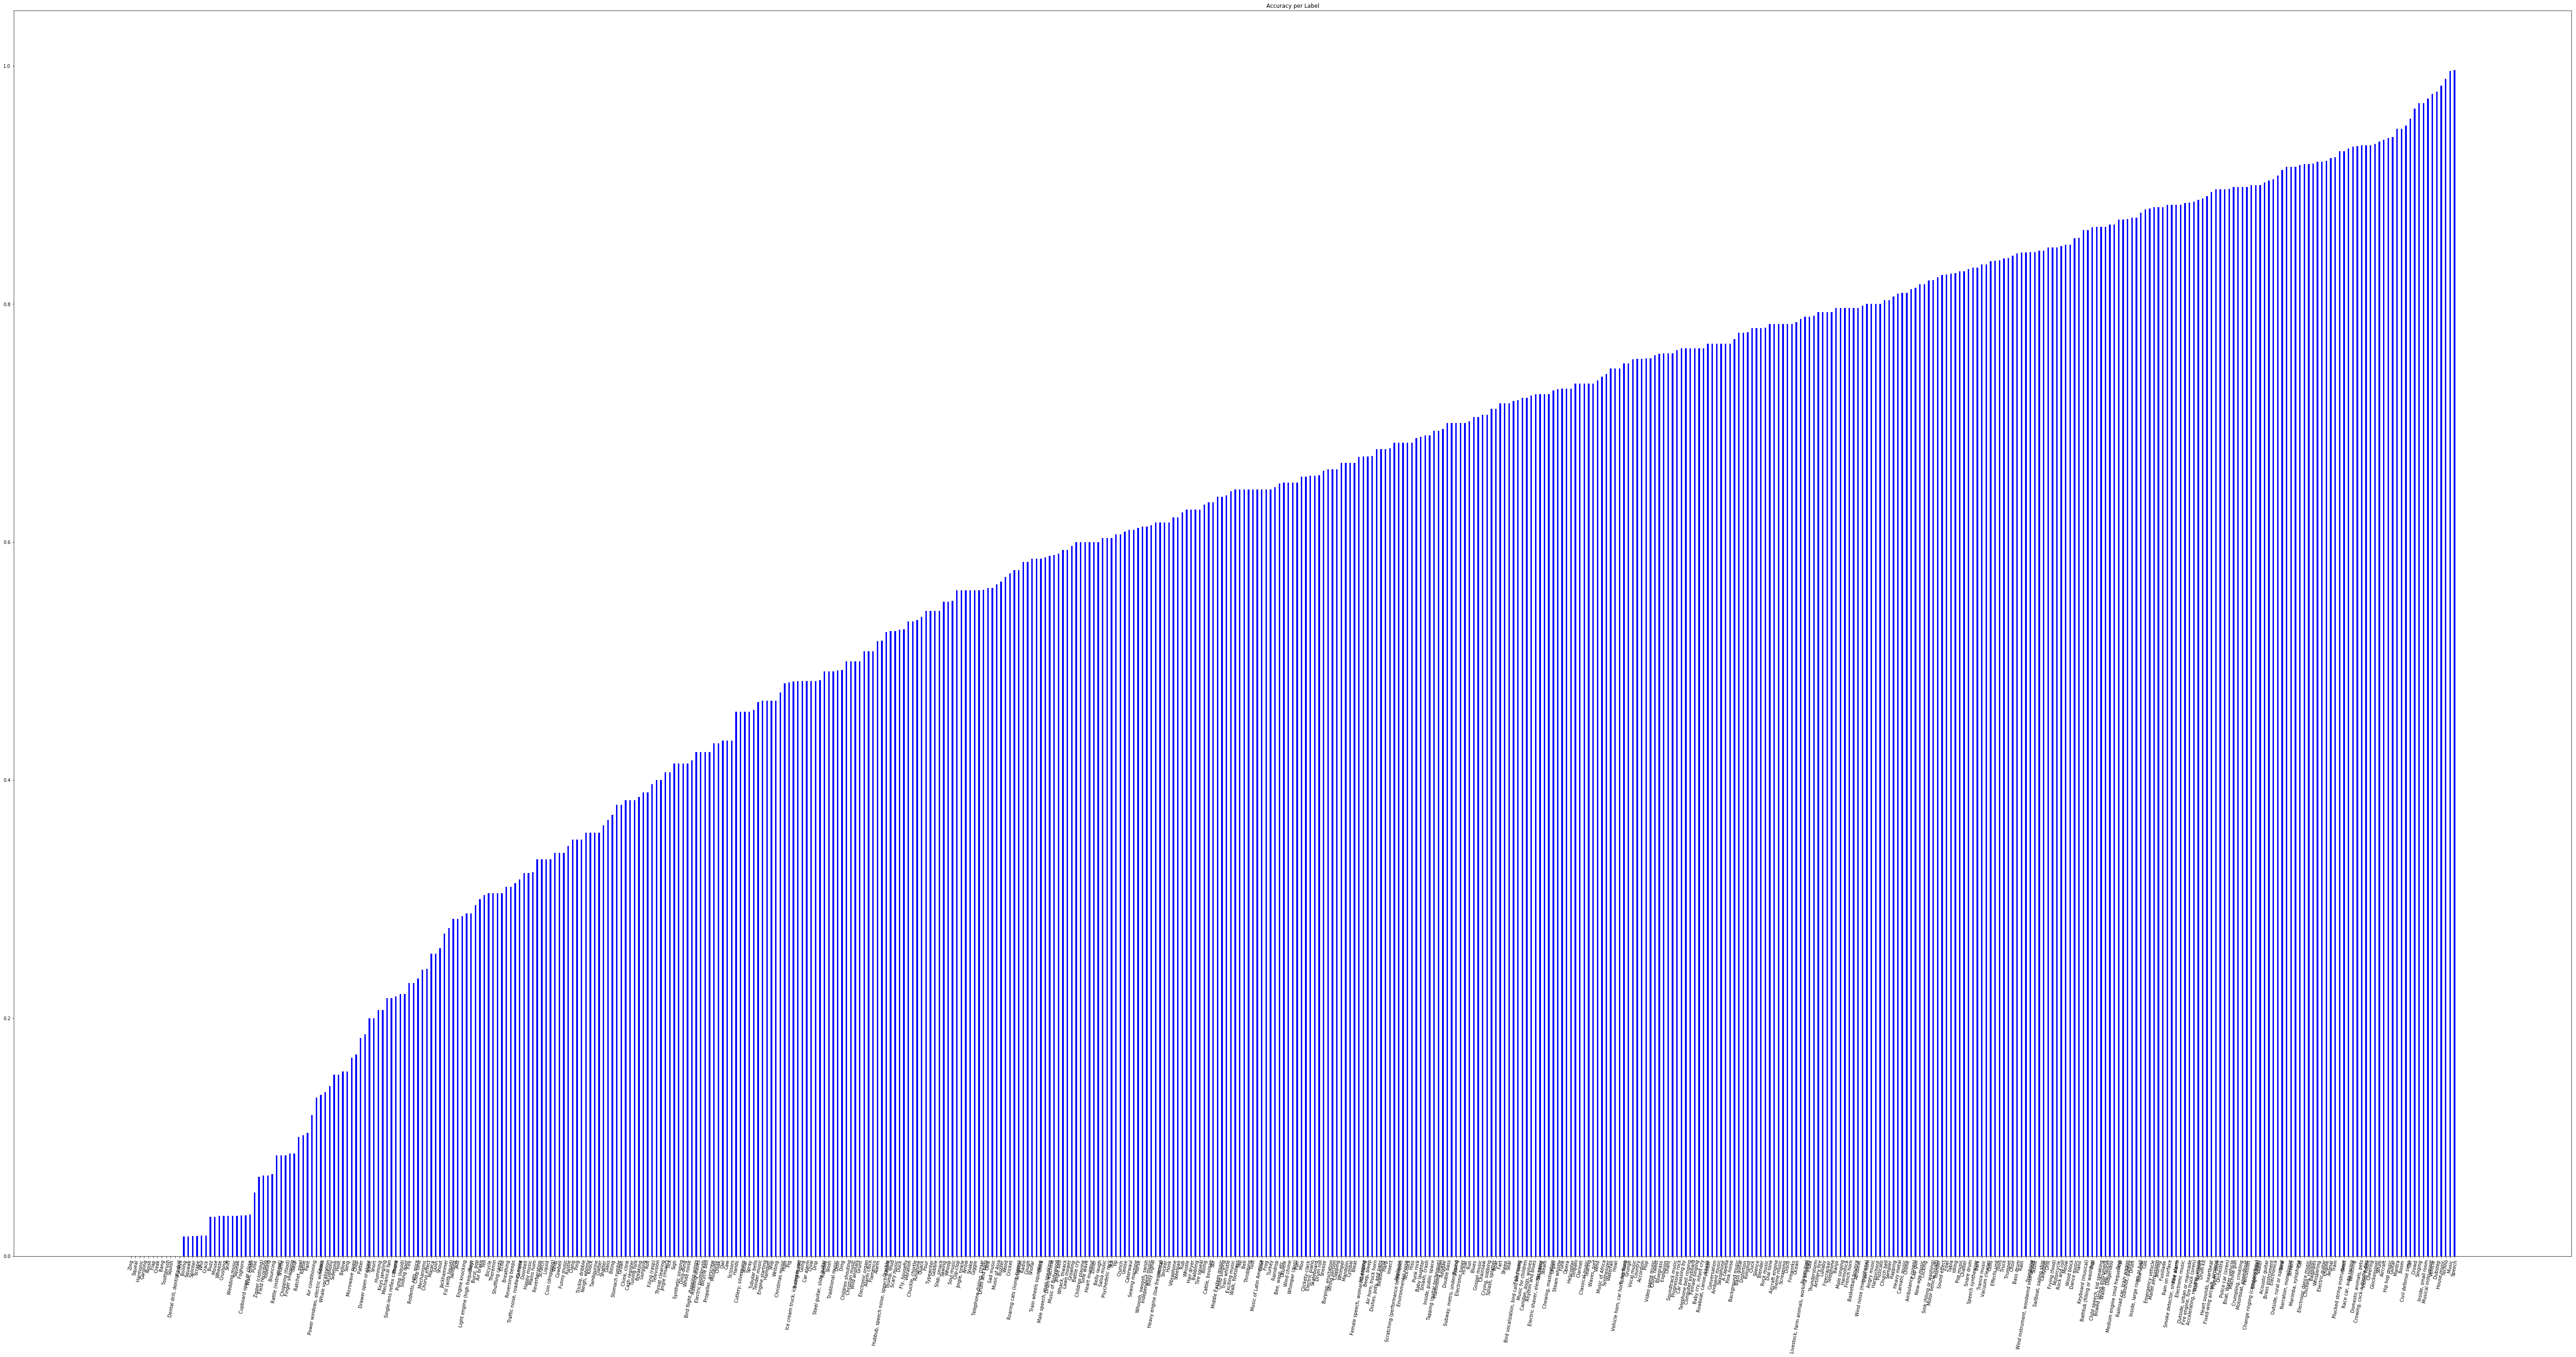

In [5]:
#Plot True Positives

Total_label_counts = np.zeros([527]) #total number of times each label occured.
Total_correct_counts = np.zeros([527]) #total number of times you got that label correct

for sample in range(len(correct_indeces)):
    for label in correct_indeces[sample]:
        if not label == -1:
            Total_label_counts[label] += 1
            if(label in index_list[sample] ):
                Total_correct_counts[label] += 1

percentages = np.divide(Total_correct_counts,Total_label_counts)

#print(percentages)

sorting = percentages.argsort()

fig, ax = plt.subplots(figsize=(100, 50))
rects1 = ax.bar(np.arange(0,527),percentages[sorting], .35, color='b')

plt.setp(ax, xticks=np.arange(0,527), xticklabels=np.array(englishLabels)[sorting])
plt.setp( ax.xaxis.get_majorticklabels(), rotation=80)
#ax.set_xticklabels(get_label_arr(indeces_dict,predictions[i]),rotation=45)
plt.title("Accuracy per Label")
plt.show()

In [ ]:
#Plot Confidence Matrix
#predictions_list
Confidence_matrix = np.zeros([527,527])
predictions_list = np.array(predictions_list)

for sample in range(len(correct_indeces)):
    if(sample%1000 == 0):
        print(sample)
    normed = predictions_list[sample]/abs(predictions_list[sample]).max()
    #normed = predictions_list[sample]/predictions_list[sample].sum()
    
    #normed = np.linalg.norm(predictions_list,np.inf)
    for label in correct_indeces[sample]:
        if not label == -1:
            Confidence_matrix[label] += normed

for row in range(len(Confidence_matrix)):
    Confidence_matrix[row] = np.divide(Confidence_matrix[row],Total_label_counts[row])
        


plotMatrix(Confidence_matrix,"Predicted full Labels Confidence_matrix",englishLabels,"predicted","actual")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
[[  8.61227380e-01   1.09862723e-02   5.30417973e-03 ...,   7.12388308e-04
    3.24152805e-03   4.33542044e-05]
 [  7.29453324e-01   6.32421396e-02   1.01969082e-02 ...,   5.86725434e-04
    9.92032466e-04   1.36269289e-05]
 [  8.34343974e-01   2.41801588e-02   3.87013144e-02 ...,   9.79630528e-04
    1.60932340e-03   1.81474577e-05]
 ..., 
 [  8.01081014e-01   1.10480380e-02   6.41332720e-03 ...,   8.64133824e-03
    1.63243488e-02   2.27776923e-05]
 [  6.05304753e-01   8.95729320e-03   1.19916132e-03 ...,   1.64318860e-03
    1.08499962e-01   8.34104446e-05]
 [  3.57121855e-01   7.38744503e-03   1.04042935e-03 ...,   1.22259243e-04
    3.58733400e-04   2.97798862e-03]]
0.977095393126
3.60804595458e-14


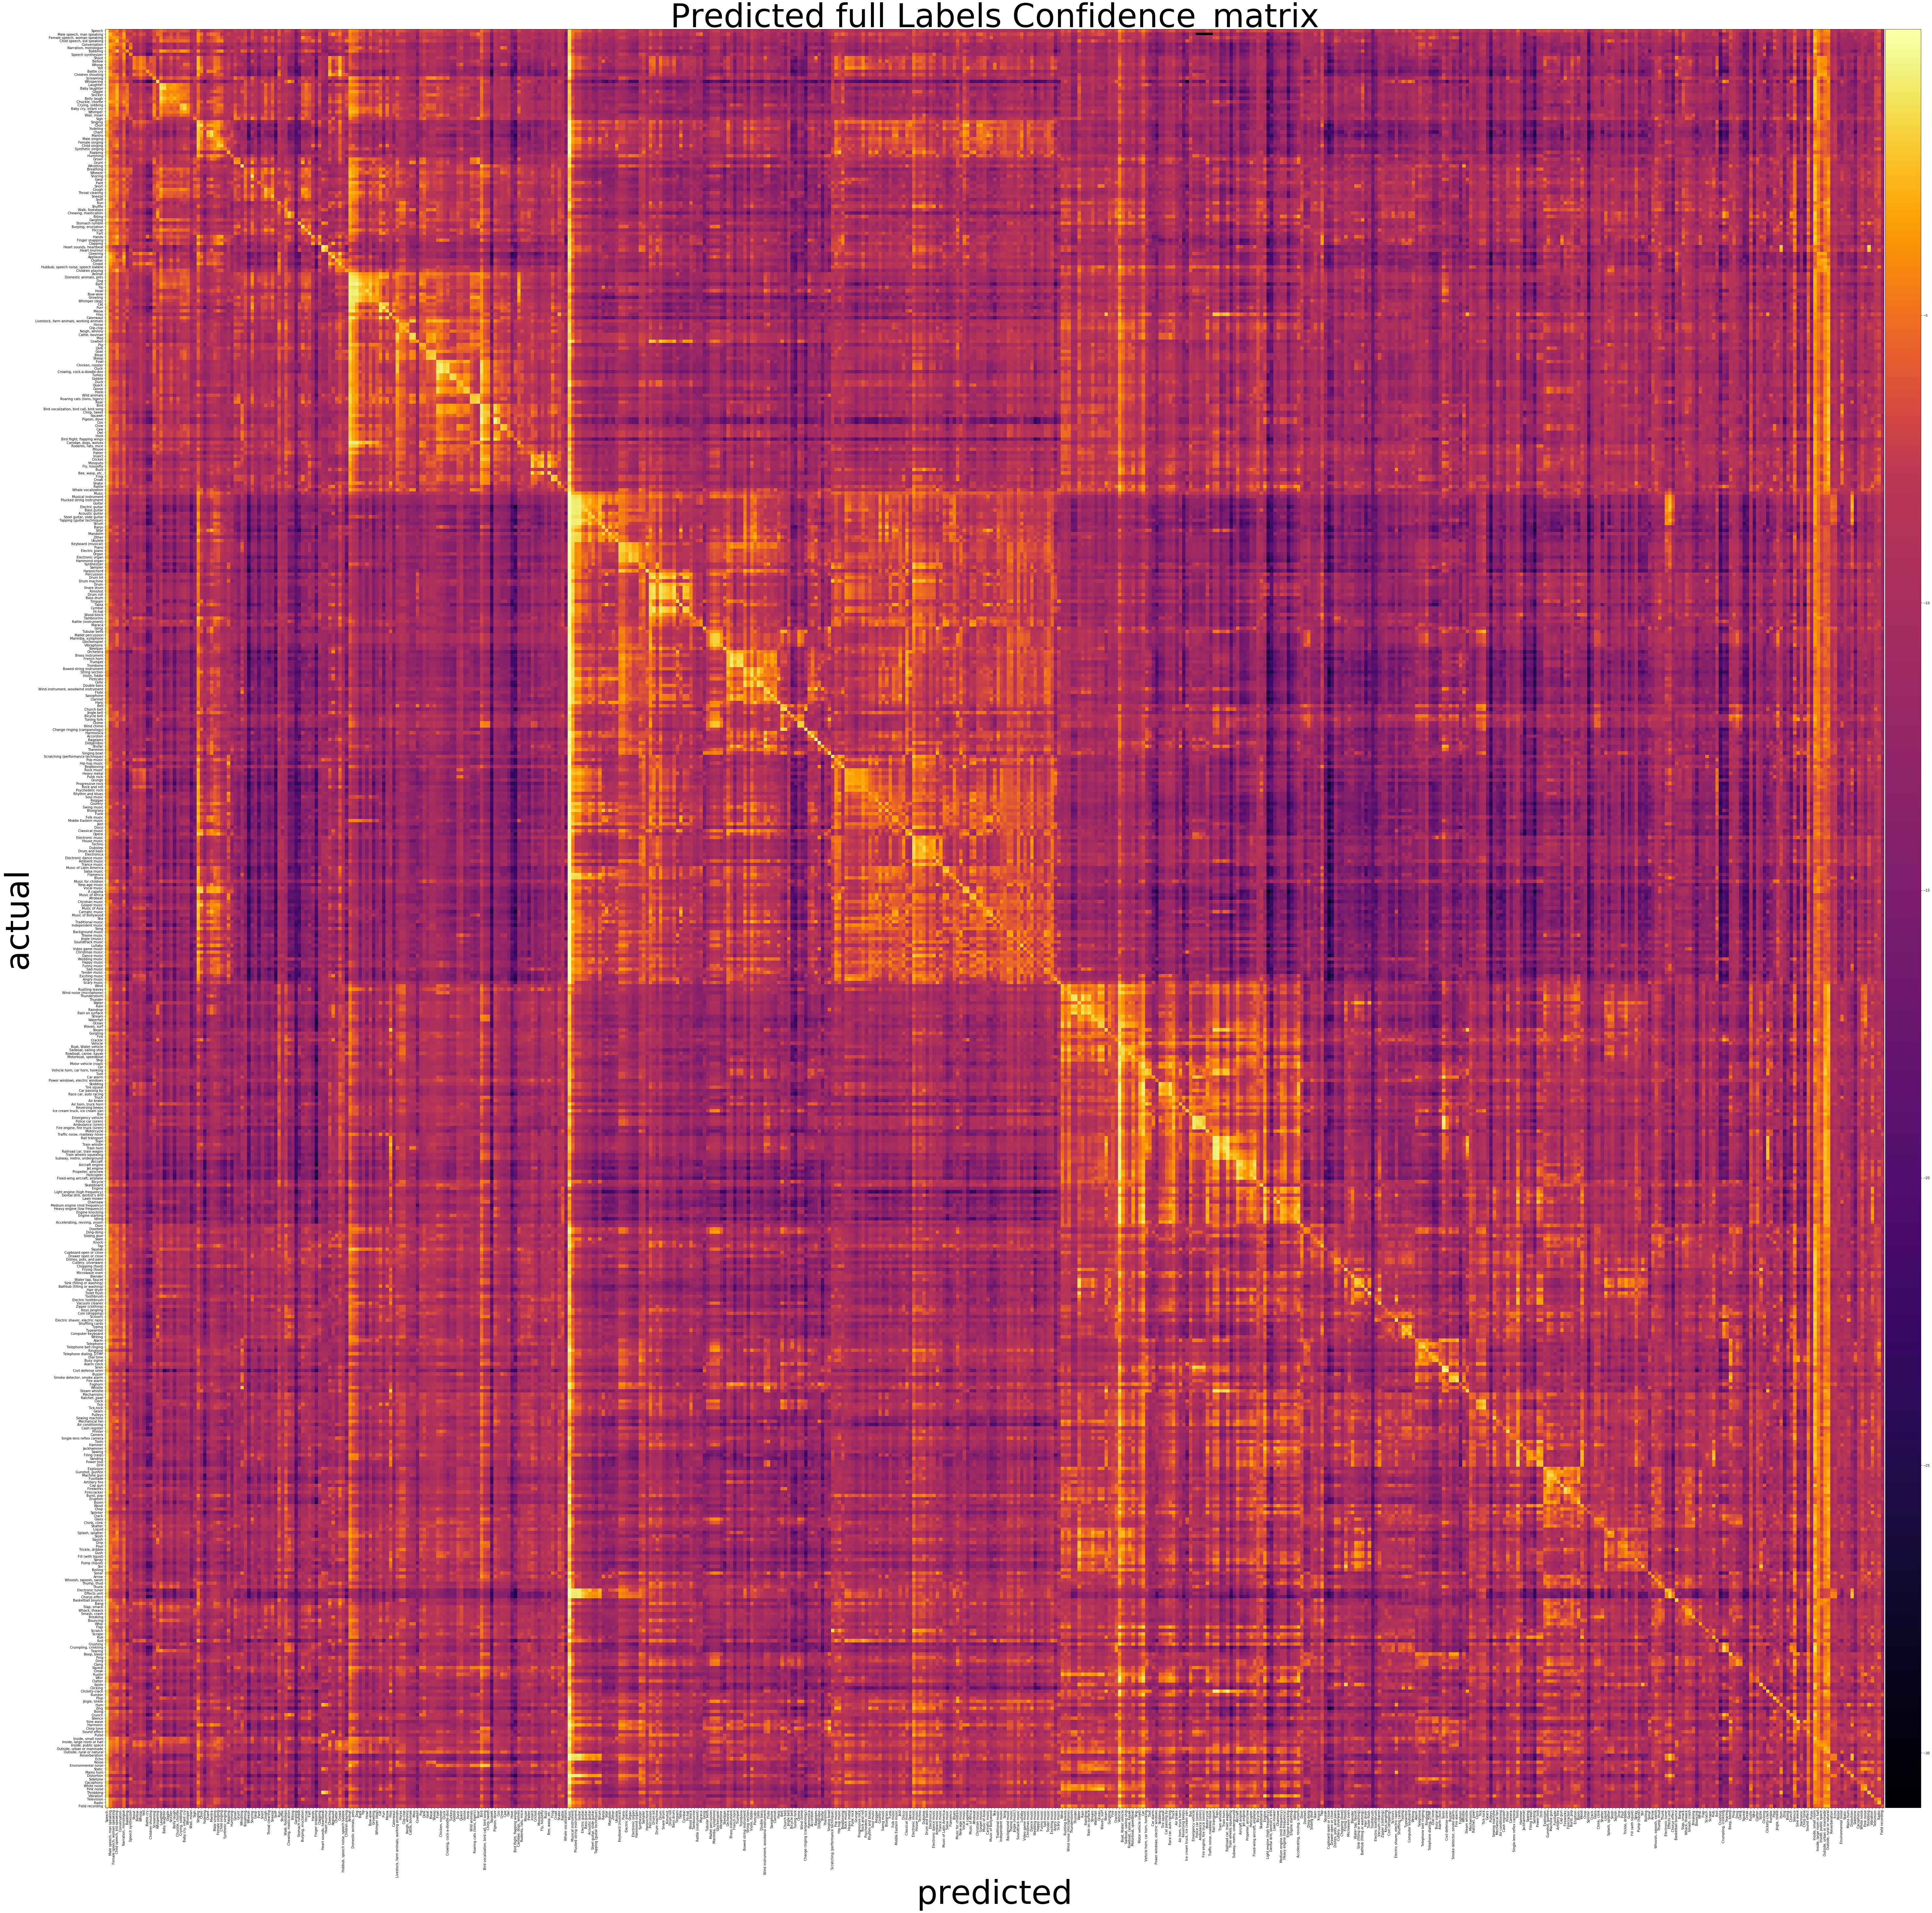

In [19]:
#Plot Confidence Matrix
#sigmoid
#predictions_list

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def softmax(x):
    """
    Compute softmax values for each sets of scores in x.
    
    Rows are scores for each class. 
    Columns are predictions (samples).
    """
    scoreMatExp = np.exp(np.asarray(x))
    return scoreMatExp / scoreMatExp.sum(0)

Confidence_matrix = np.zeros([527,527])
predictions_list = np.array(predictions_list)

siglist = np.vectorize(sigmoid)

for sample in range(len(correct_indeces)):
    if(sample%1000 == 0):
        print(sample)
    #normed = predictions_list[sample]/abs(predictions_list[sample]).max()
    #normed = softmax(predictions_list[sample])
    normed = siglist(predictions_list[sample])
    #normed = siglist( predictions_list[sample]/abs(predictions_list[sample]).max())
    #normed = predictions_list[sample]
    #print(normed)
    #normed = predictions_list[sample]/predictions_list[sample].sum()
    
    #normed = np.linalg.norm(predictions_list,np.inf)
    for label in correct_indeces[sample]:
        if not label == -1:
            Confidence_matrix[label] += normed
         
for row in range(len(Confidence_matrix)):   
    Confidence_matrix[row] = np.divide(Confidence_matrix[row],Total_label_counts[row])
    #Confidence_matrix[row] = (Confidence_matrix[row] - Confidence_matrix[row].min())/(Confidence_matrix[row].max()-Confidence_matrix[row].min())
 
    
print(Confidence_matrix) 
print(Confidence_matrix.max())
print(Confidence_matrix.min()) 

Confidence_matrix = np.log(Confidence_matrix)

plotMatrix(Confidence_matrix,"Predicted full Labels Confidence_matrix",englishLabels,"predicted","actual")


In [ ]:
#Plot Confidence Matrix
#cut off at N number of labels
#predictions_list
Confidence_matrix = np.zeros([527,527])
predictions_list = np.array(predictions_list)
count = 0
for sample in range(len(correct_indeces)):
    if(sample%1000 == 0):
        print(sample)
    normed = predictions_list[sample]/abs(predictions_list[sample]).max()
    #normed = np.linalg.norm(predictions_list,np.inf)
    if correct_indeces[sample][2] == -1:
        count += 1
        for label in correct_indeces[sample]:
            if not label == -1:
                Confidence_matrix[label] += normed

for row in range(len(Confidence_matrix)):
    Confidence_matrix[row] = np.divide(Confidence_matrix[row],Total_label_counts[row])
        
print("count: ", count)
Confidence_matrix[Confidence_matrix == 0] = 'nan'
plotMatrix(Confidence_matrix,"Confidence_matrix",englishLabels,"predicted","actual")

In [ ]:
import tensorflow as tf
import numpy as np
import sys
import h5py
import random
import math
from math import sqrt
import argparse

from IPython.core.display import HTML, display
import scipy.signal as signal
from scipy.io import wavfile



def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """

    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>

    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))
    
wavPlayer("/../../../../mindhive/mcdermott/shared/Sounds/165_natural_sounds/stim97_crickets.wav")

In [ ]:
from PedrosNetworkFunctionsALPHA import *
import tensorflow as tf
import numpy as np

In [ ]:
n = {}
n['labels'] = tf.placeholder(tf.int32, [None, 15], name='labels')
n['preds'] = tf.placeholder(tf.float32, [None, 15], name='preds')

n["auc"], n['updateop'] = tf.metrics.auc(
    labels = n['labels'],
    predictions = n['preds'],
    weights=None,
    num_thresholds=10,
    metrics_collections=None,
    updates_collections=None,
    curve='ROC',
    name='aucfunction'
)
with tf.Session() as sess:
    #sess.run(tf.local_variables_initializer)
    sess.run(tf.initialize_all_variables())
    sess.run(tf.initialize_local_variables()) 
    print("wheee",sess.run(n["auc"]))
    aucthing  = sess.run(n['updateop'],feed_dict={n['labels']:[[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0]],n['preds']:np.array([[.2,.9,.1,.4,.5,.9,1,0,0.7,.30,1,0,.8,.7,0] ,[.2,.9,.9,.4,.5,.2,0,0,0.3,.30,0.1,.2,.4,.3,0.9]])/1})
    #aucthing  = sess.run(n['updateop'],feed_dict={n['labels']:[[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0]],n['preds']:[[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0]]})
    print(aucthing)
    
    sess.run(tf.variables_initializer(n["auc"]))
    
    aucthing  = sess.run(n['updateop'],feed_dict={n['labels']:[[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0]],n['preds']:np.array([[.2,.9,.1,.4,.5,.9,1,0,0.7,.30,1,0,.8,.7,0] ,[.2,.9,.9,.4,.5,.2,0,0,0.3,.30,0.1,.2,.4,.3,0.9]])/1})
    #aucthing  = sess.run(n['updateop'],feed_dict={n['labels']:[[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0]],n['preds']:[[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[0,1,0,0,1,1,1,0,0,0,1,0,1,1,0]]})
    print(aucthing)
    
    #n["auc"].update_op([0,1,0,0,1,1,1,0,0,0,1,0,1,1,0],[.2,.9,.9,.4,.5,.2,0,0,0.3,.30,0.1,.2,.4,.3,0.9])
    print("wheee",sess.run(n["auc"]))
    

In [ ]:
import random
import numpy as np
p = np.array([random.random() for _ in range(10)])
a = np.array([random.choice([0, 1]) for _ in range(10)])
print(a)
print(p)
ap = AveragePrecisionCalculator.ap(p, a)

print(ap)
print()

print(AveragePrecisionCalculator.ap([1,0,0,0,0],[0,1,0,0,0]))
print(AveragePrecisionCalculator.ap([0,1,0,0,0],[0,1,0,0,0]))
print(AveragePrecisionCalculator.ap([0,0,1,0,0],[0,1,0,0,0]))
print(AveragePrecisionCalculator.ap([0,0,0,1,0],[0,1,0,0,0]))
print(AveragePrecisionCalculator.ap([0,0,0,0,1],[0,1,0,0,0]))

print(AveragePrecisionCalculator.ap([.9,.8,.7,.6,.4,.2],[1,0,1,1,1,0]))

print("foo")
print(AveragePrecisionCalculator.ap([0, 0, 1, 0, 0, 1, 0, 0, 1],[1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [ ]:
calculator = AveragePrecisionCalculator(150)

calculator.accumulate(np.array([.6,.4,.2]),np.array([1,1,0]))
calculator.accumulate( np.flip(np.array([.9,.8,.7]),0) , np.flip(np.array([1,0,1]),0))


print(calculator.peek_ap_at_n())



In [ ]:
calculator = AveragePrecisionCalculator(150)

calculator.accumulate(np.array([.6,.4,.2]),np.array([True,True,False]))
calculator.accumulate( np.flip(np.array([.9,.8,.7]),0) , np.flip(np.array([True,False,True]),0))


print(calculator.peek_ap_at_n())

In [ ]:
calculator = AveragePrecisionCalculator(150)

calculator.accumulate(np.array([-.7,-.8,-.9]),np.array([True,True,False]))
calculator.accumulate( np.flip(np.array([-.4,-.5,-.6]),0) , np.flip(np.array([True,False,True]),0))


print(calculator.peek_ap_at_n())

In [ ]:
p1 = np.array([random.random() for _ in range(5)])
a1 = np.array([random.choice([0, 1]) for _ in range(5)])
p2 = np.array([random.random() for _ in range(5)])
a2 = np.array([random.choice([0, 1]) for _ in range(5)])
# interpolated average precision at 10 using 1000 break points
calculator = AveragePrecisionCalculator(10)
calculator.accumulate(p1, a1)
calculator.accumulate(p2, a2)
ap3 = calculator.peek_ap_at_n()
print(ap3)